# IPPR Lab 3

## Name : Arya Shah
## Roll No. E071
## Class : BTech CSBS

# Aim: To Apply Spatial Filters To Enhance The Given Images

## Use Average Filter To Reduce Gaussian Noise and Median Filter To Reduce Salt & Pepper Noise

In [1]:
#Importing Libraries
from skimage import io
import matplotlib.pyplot as plt
from skimage.color import rgb2gray

In [2]:
import numpy as np
from scipy import signal

In [3]:
#Import Image
image=io.imread('watch.png')

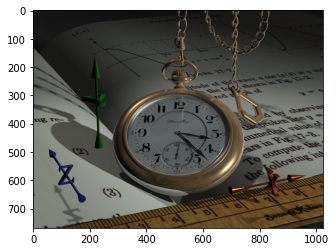

In [4]:
plt.imshow(image)

In [5]:
image.shape

(768, 1024, 3)

In [6]:
sh=image.shape
rows=sh[0]
cols=sh[1]

In [7]:
# Setting Mu and Sigma Value for Average Filter / Gaussian Parameters
mu = 0 
sigma = 5
gn = np.random.normal(mu,sigma,(rows,cols))

In [8]:
image_gn = image.copy()

In [9]:
# Applying on all 3 Planes
image_gn[:,:,0] = image[:,:,0]+gn
image_gn[:,:,1] = image[:,:,1]+gn
image_gn[:,:,2] = image[:,:,2]+gn

Text(0.5, 1.0, 'Noisy Image')

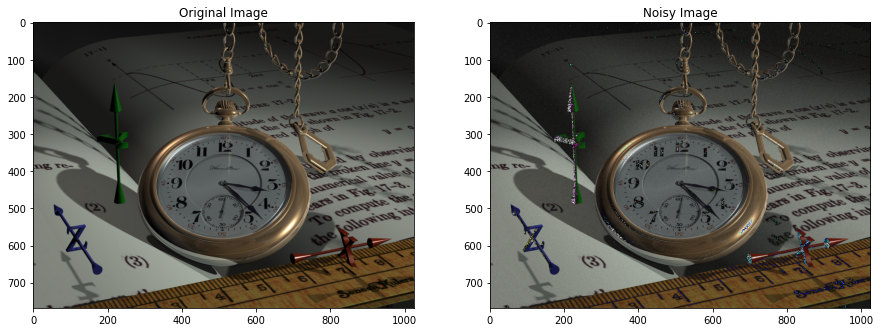

In [10]:
#Display original and noisy image
plt.figure(figsize=(15,15)) 
plt.subplot(1,2,1)
plt.imshow(image)
plt.title('Original Image')

plt.subplot(1,2,2)
plt.imshow(image_gn)
plt.title('Noisy Image')

In [11]:
# Keeping Filter Size as 3x3
sz = 3 

In [12]:
avg_filter = np.ones((sz,sz))/(sz*sz)

In [13]:
image_avg_filt = image_gn.copy()

In [14]:
'''
We are convolving image to the filter.
Since size of filter is different than the image
'''
image_avg_filt[:,:,0] = signal.convolve2d(image_gn[:,:,0],avg_filter, mode='same')
image_avg_filt[:,:,1] = signal.convolve2d(image_gn[:,:,1],avg_filter, mode='same')
image_avg_filt[:,:,2] = signal.convolve2d(image_gn[:,:,2],avg_filter, mode='same')

# Mode = same so that output is same as the image

Text(0.5, 1.0, 'Filter 3x3')

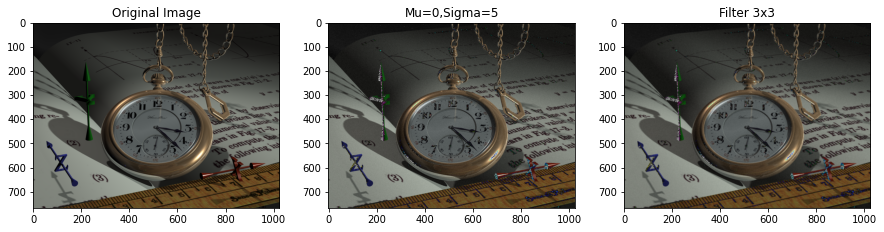

In [16]:
# og,noisy with title mu sigma, third avg filter with size 3x3
#Display original and transformed image
plt.figure(figsize=(15,15)) 
plt.subplot(1,3,1)
plt.imshow(image,cmap='gray')
plt.title('Original Image')

plt.subplot(1,3,2)
plt.imshow(image_gn,cmap='gray')
plt.title('Mu=0,Sigma=5')

plt.subplot(1,3,3)
plt.imshow(image_avg_filt)
plt.title('Filter 3x3')

# Part 2

### Trying with different set of values

In [17]:
# Setting Mu and Sigma Value for Average Filter / Gaussian Parameters
mu = 0 
sigma = 20
gn = np.random.normal(mu,sigma,(rows,cols))

In [18]:
image_gn1 = image.copy()

In [19]:
# Applying on all 3 Planes
image_gn1[:,:,0] = image[:,:,0]+gn
image_gn1[:,:,1] = image[:,:,1]+gn
image_gn1[:,:,2] = image[:,:,2]+gn

Text(0.5, 1.0, 'Noisy Image')

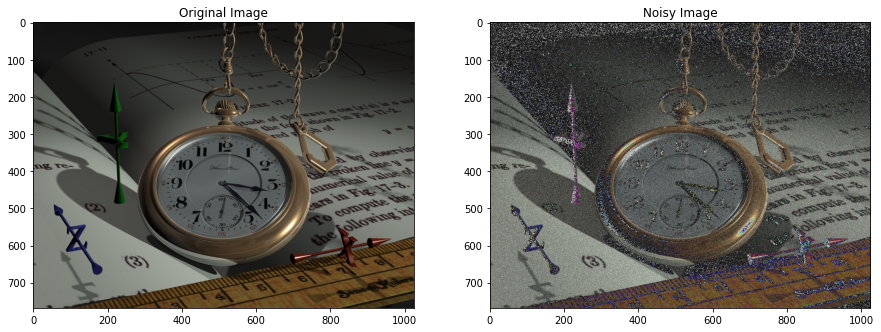

In [20]:
#Display original and noisy image
plt.figure(figsize=(15,15)) 
plt.subplot(1,2,1)
plt.imshow(image)
plt.title('Original Image')

plt.subplot(1,2,2)
plt.imshow(image_gn1)
plt.title('Noisy Image')

In [21]:
# Keeping Filter Size as 11x11
sz = 11

In [22]:
avg_filter = np.ones((sz,sz))/(sz*sz)

In [23]:
image_avg_filt = image_gn1.copy()

In [24]:
'''
We are convolving image to the filter.
Since size of filter is different than the image
'''
image_avg_filt[:,:,0] = signal.convolve2d(image_gn1[:,:,0],avg_filter, mode='same')
image_avg_filt[:,:,1] = signal.convolve2d(image_gn1[:,:,1],avg_filter, mode='same')
image_avg_filt[:,:,2] = signal.convolve2d(image_gn1[:,:,2],avg_filter, mode='same')

# Mode = same so that output is same as the image

Text(0.5, 1.0, 'Filter 11x11')

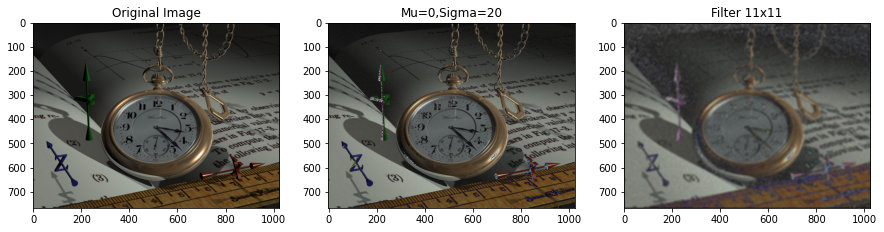

In [25]:
#Display original and transformed image
plt.figure(figsize=(15,15)) 
plt.subplot(1,3,1)
plt.imshow(image,cmap='gray')
plt.title('Original Image')

plt.subplot(1,3,2)
plt.imshow(image_gn,cmap='gray')
plt.title('Mu=0,Sigma=20')

plt.subplot(1,3,3)
plt.imshow(image_avg_filt)
plt.title('Filter 11x11')

# Conclusion

- **The given image wis corrected with Guassian noise with mean=0 and sigma =11, the noisy image is filtered by avg filter of size 3x3 and it is observed that the filter is not very effective in reducing the amount of noise.**

- **If size of filter is increased to 11x11 then the amount of noise reduces significantly.**

- **However, increase in size of the filter causes blurry effect on the image.**

- **Solution for the above is to use weighted average filter(Gaussian Filter)**